In [ ]:
import os
import shutil
import zipfile
from google.colab import drive

# Mount Drive
drive.mount('/content/drive')

# Source zip in Drive
drive_zip_path = "/content/drive/MyDrive/massive-ai-vs-real.zip"

# Target extract location
target_dir = "/content/data"

# Remove old folder if it exists
if os.path.exists(target_dir):
    print("♻️ Removing old /content/data directory...")
    shutil.rmtree(target_dir)

# Recreate clean folder
os.makedirs(target_dir, exist_ok=True)

# Extract fresh dataset
print("📦 Extracting dataset to /content/data ...")
with zipfile.ZipFile(drive_zip_path, 'r') as zip_ref:
    zip_ref.extractall(target_dir)

print("✅ Extraction complete! Fresh dataset is ready at /content/data")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
♻️ Removing old /content/data directory...
📦 Extracting dataset to /content/data ...


KeyboardInterrupt: 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
import os
import zipfile
import time

# 1️⃣ Mount Drive
drive.mount('/content/drive')

# 2️⃣ Define paths
zip_path = "/content/drive/MyDrive/cleaned_dataset.zip"   # your uploaded zip file
extract_path = "/content/data"   # where to unzip it

# 3️⃣ Make sure the extract folder exists
os.makedirs(extract_path, exist_ok=True)

# 4️⃣ Unzip
print(f"📦 Unzipping dataset to: {extract_path}")
start = time.time()

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"✅ Unzip complete in {time.time() - start:.2f}s")
print(f"📁 Dataset ready at: {extract_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
📦 Unzipping dataset to: /content/data
✅ Unzip complete in 23.05s
📁 Dataset ready at: /content/data


In [ ]:
from google.colab import drive
# Force remounting Google Drive to refresh credentials
drive.mount('/content/drive', force_remount=True)

MessageError: Error: credential propagation was unsuccessful

In [ ]:
import zipfile
import os
import shutil

drive_zip = "/content/drive/MyDrive/massive-ai-vs-real.zip"
target_dir = "/content/data/train/real"

print("📦 Extracting only train/real from ZIP...")

# Clean up target if exists
if os.path.exists(target_dir):
    shutil.rmtree(target_dir)
os.makedirs(target_dir, exist_ok=True)

with zipfile.ZipFile(drive_zip, 'r') as zip_ref:
    # Filter files that are in train/real/
    members = [m for m in zip_ref.namelist() if m.startswith("train/real/") and not m.endswith("/")]
    for member in members:
        # Extract only these files
        zip_ref.extract(member, "/content/data")

print("✅ Extraction complete! Folder ready at:", target_dir)


📦 Extracting only train/real from ZIP...


KeyboardInterrupt: 

In [ ]:
import os
import random
import shutil

# Paths to your folders
real_dir = "/content/data/train/real"
fake_dir = "/content/data/train/fake"

# Get list of image files
real_images = [f for f in os.listdir(real_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
fake_images = [f for f in os.listdir(fake_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

real_count = len(real_images)
fake_count = len(fake_images)

print(f"Before balancing:")
print(f"  Real: {real_count}")
print(f"  Fake: {fake_count}")

# Determine which to trim
if real_count < fake_count:
    # Too many fakes — remove extras
    to_remove = fake_count - real_count
    remove_files = random.sample(fake_images, to_remove)
    for file in remove_files:
        os.remove(os.path.join(fake_dir, file))
    print(f"Removed {to_remove} fake images.")
elif fake_count < real_count:
    # Too many reals — remove extras
    to_remove = real_count - fake_count
    remove_files = random.sample(real_images, to_remove)
    for file in remove_files:
        os.remove(os.path.join(real_dir, file))
    print(f"Removed {to_remove} real images.")
else:
    print("✅ Dataset already balanced!")

# Recount
final_real = len(os.listdir(real_dir))
final_fake = len(os.listdir(fake_dir))
print(f"\nAfter balancing:")
print(f"  Real: {final_real}")
print(f"  Fake: {final_fake}")


Before balancing:
  Real: 13961
  Fake: 24000
Removed 10039 fake images.

After balancing:
  Real: 13961
  Fake: 13961


In [ ]:
import os
import shutil
import random
from math import floor

# Paths
test_root = "/content/data/test"
val_root = "/content/data/val"

# Create val folders if not exist
os.makedirs(val_root, exist_ok=True)

for category in ["real", "fake"]:
    src = os.path.join(test_root, category)
    dst = os.path.join(val_root, category)
    os.makedirs(dst, exist_ok=True)

    # Get image list and shuffle
    files = [f for f in os.listdir(src) if os.path.isfile(os.path.join(src, f))]
    random.shuffle(files)

    # Split exactly in half
    half = floor(len(files) / 2)
    val_files = files[:half]
    test_files = files[half:]

    # Move half to val folder
    for f in val_files:
        shutil.move(os.path.join(src, f), os.path.join(dst, f))

    print(f"✅ Moved {len(val_files)} shuffled images from {src} → {dst}")
    print(f"🧩 Remaining in test: {len(test_files)} images")

print("\nSplit complete — val and test sets are now equal halves with no overlap.")


✅ Moved 3000 shuffled images from /content/data/test/real → /content/data/val/real
🧩 Remaining in test: 3000 images
✅ Moved 3000 shuffled images from /content/data/test/fake → /content/data/val/fake
🧩 Remaining in test: 3000 images

Split complete — val and test sets are now equal halves with no overlap.


In [ ]:

import os

# Path to your zip file in Drive
zip_path = "/content/drive/MyDrive/massive-ai-vs-real.zip"

# Destination folder in Colab
unzip_dest = "/content/AI_vs_Real_raw"
os.makedirs(unzip_dest, exist_ok=True)


In [ ]:
!unzip -q "{zip_path}" -d "{unzip_dest}"


In [ ]:
import os
import shutil

old_root = "/content/AI_vs_Real_raw"
new_root = "/content/data"

if os.path.exists(old_root):
    if os.path.exists(new_root):
        print(f"❌ Folder '{new_root}' already exists — remove or rename it first.")
    else:
        shutil.move(old_root, new_root)
        print(f"✅ Dataset root renamed from '{old_root}' to '{new_root}'")
else:
    print(f"⚠️ Folder '{old_root}' not found.")


✅ Dataset root renamed from '/content/AI_vs_Real_raw' to '/content/data'


In [ ]:
import os

folders = {
    "Train Real": "/content/data/train/real",
    "Train Fake": "/content/data/train/fake",
    "Test Real": "/content/data/test/real",
    "Test Fake": "/content/data/test/fake"
}

for name, path in folders.items():
    if os.path.exists(path):
        count = len([f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))])
        print(f"{name}: {count} images")
    else:
        print(f"{name}: Folder not found")


Train Real: 13961 images
Train Fake: 13961 images
Test Real: 3000 images
Test Fake: 3000 images


In [ ]:
import os
import shutil
import random

# Paths
test_root = "/content/AI_vs_Real_128x128/test"
val_root = "/content/AI_vs_Real_128x128/val"

# Ensure val folders exist
for category in ["real", "fake"]:
    os.makedirs(os.path.join(val_root, category), exist_ok=True)

# Split each category
for category in ["real", "fake"]:
    test_folder = os.path.join(test_root, category)
    val_folder = os.path.join(val_root, category)

    files = [f for f in os.listdir(test_folder) if os.path.isfile(os.path.join(test_folder, f))]
    random.shuffle(files)  # shuffle to get random half

    split_index = len(files) // 2
    val_files = files[:split_index]

    # Move half to val folder
    for f in val_files:
        src_path = os.path.join(test_folder, f)
        dst_path = os.path.join(val_folder, f)
        shutil.move(src_path, dst_path)

    print(f"{category}: moved {len(val_files)} files from test → val")


FileNotFoundError: [Errno 2] No such file or directory: '/content/AI_vs_Real_128x128/test/real'

In [ ]:
import os

folders = {
    "Train Real": "/content/data/train/real",
    "Train Fake": "/content/data/train/fake",
    "Test Real": "/content/data/test/real",
    "Test Fake": "/content/data/test/fake",
    "Val Real": "/content/data/val/real",
    "Val Fake": "/content/data/val/fake"
}

for name, path in folders.items():
    if os.path.exists(path):
        count = len([f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))])
        print(f"{name}: {count} images")
    else:
        print(f"{name}: Folder not found")


Train Real: 13953 images
Train Fake: 13960 images
Test Real: 2998 images
Test Fake: 3000 images
Val Real: 2999 images
Val Fake: 3000 images


In [ ]:
import os

# Base dataset directory
base_dir = "/content/data"

# Define all subdirectories
data_dirs = [
    os.path.join(base_dir, "train/real"),
    os.path.join(base_dir, "train/fake"),
    os.path.join(base_dir, "test/real"),
    os.path.join(base_dir, "test/fake"),
    os.path.join(base_dir, "val/real"),
    os.path.join(base_dir, "val/fake"),
]

total_size = 0  # in bytes

print("📦 Dataset Folder Sizes:\n")

for folder in data_dirs:
    folder_size = 0
    for f in os.listdir(folder):
        file_path = os.path.join(folder, f)
        if os.path.isfile(file_path):
            folder_size += os.path.getsize(file_path)
    total_size += folder_size
    print(f"{folder}: {folder_size / (1024 * 1024):.2f} MB")

print(f"\n💾 Total dataset size: {total_size / (1024 * 1024 * 1024):.2f} GB")


📦 Dataset Folder Sizes:

/content/data/train/real: 262.71 MB
/content/data/train/fake: 287.13 MB
/content/data/test/real: 54.85 MB
/content/data/test/fake: 61.15 MB
/content/data/val/real: 54.41 MB
/content/data/val/fake: 61.95 MB

💾 Total dataset size: 0.76 GB


In [ ]:
from PIL import Image, UnidentifiedImageError
import os
import time

# Dataset directories in correct order
data_dirs = [
    "/content/data/test/real",
    "/content/data/test/fake",
    "/content/data/val/real",
    "/content/data/val/fake",
    "/content/data/train/real",
    "/content/data/train/fake",
]

target_size = (256, 256)  # Resize target
total_removed = 0

print("🧹 Cleaning and resizing dataset...\n")

for folder in data_dirs:
    removed_count = 0
    processed_count = 0

    files = os.listdir(folder)
    total_files = len(files)

    if total_files == 0:
        print(f"⚠️  Skipping empty folder: {folder}\n")
        continue

    batch_start_time = time.time()

    for idx, file_name in enumerate(files, start=1):
        file_path = os.path.join(folder, file_name)
        try:
            # Validate image
            with Image.open(file_path) as img:
                img.verify()

            # Reopen to resize
            with Image.open(file_path) as img:
                img = img.convert("RGB")
                if img.size != target_size:
                    img = img.resize(target_size)
                    img.save(file_path, format="JPEG", quality=90)

            processed_count += 1

        except (IOError, SyntaxError, UnidentifiedImageError):
            os.remove(file_path)
            removed_count += 1

        # Show progress every 50 images or at the end
        if idx % 50 == 0 or idx == total_files:
            elapsed = time.time() - batch_start_time
            print(f"[{folder}] {idx}/{total_files} processed — Batch time: {elapsed:.2f}s")
            batch_start_time = time.time()

    total_removed += removed_count
    print(f"✅ {folder} → Cleaned: {processed_count}, Removed corrupted: {removed_count}\n")

print(f"\n🚀 Total corrupted images removed across all folders: {total_removed}")


🧹 Cleaning and resizing dataset...

[/content/data/test/real] 50/2998 processed — Batch time: 0.08s
[/content/data/test/real] 100/2998 processed — Batch time: 0.03s
[/content/data/test/real] 150/2998 processed — Batch time: 0.03s
[/content/data/test/real] 200/2998 processed — Batch time: 0.03s
[/content/data/test/real] 250/2998 processed — Batch time: 0.03s
[/content/data/test/real] 300/2998 processed — Batch time: 0.04s
[/content/data/test/real] 350/2998 processed — Batch time: 0.03s
[/content/data/test/real] 400/2998 processed — Batch time: 0.03s
[/content/data/test/real] 450/2998 processed — Batch time: 0.03s
[/content/data/test/real] 500/2998 processed — Batch time: 0.03s
[/content/data/test/real] 550/2998 processed — Batch time: 0.03s
[/content/data/test/real] 600/2998 processed — Batch time: 0.03s
[/content/data/test/real] 650/2998 processed — Batch time: 0.03s
[/content/data/test/real] 700/2998 processed — Batch time: 0.03s
[/content/data/test/real] 750/2998 processed — Batch ti

In [ ]:
import shutil
import time

dataset_dir = "/content/data"
zip_path = "/content/cleaned_dataset.zip"

start = time.time()
print("📦 Zipping cleaned dataset...")

shutil.make_archive(zip_path.replace(".zip", ""), 'zip', dataset_dir)

print(f"✅ Zipped to {zip_path} in {time.time() - start:.2f} seconds.")


📦 Zipping cleaned dataset...
✅ Zipped to /content/cleaned_dataset.zip in 41.05 seconds.


In [ ]:
import shutil

drive_target = "/content/drive/MyDrive/cleaned_dataset.zip"
shutil.copy(zip_path, drive_target)

print(f"☁️ Uploaded to Google Drive at: {drive_target}")


☁️ Uploaded to Google Drive at: /content/drive/MyDrive/cleaned_dataset.zip


In [ ]:
from PIL import Image, UnidentifiedImageError
import os

# Dataset directories
data_dirs = [
    "/content/data/test/real",
    "/content/data/test/fake",
    "/content/data/val/real",
    "/content/data/val/fake",
    "/content/data/train/fake",
    "/content/data/train/real",
]

corrupted_count = 0

for folder in data_dirs:
    folder_corrupted = 0
    if not os.path.exists(folder):
        print(f"Folder not found: {folder}")
        continue

    files = os.listdir(folder)
    if not files:
        print(f"No files in folder: {folder}")
        continue

    for file_name in files:
        file_path = os.path.join(folder, file_name)
        if not os.path.isfile(file_path):
            continue  # skip subfolders or non-files

        try:
            with Image.open(file_path) as img:
                img.verify()  # quick corruption check
        except (IOError, SyntaxError, UnidentifiedImageError):
            print(f"Corrupted: {file_path}")
            corrupted_count += 1
            folder_corrupted += 1

    print(f"Folder {folder} → Corrupted images found: {folder_corrupted}")

print(f"\nTotal corrupted images in dataset: {corrupted_count}")


In [ ]:
from PIL import Image, UnidentifiedImageError
import os
import time

# ✅ Source folders in Colab
source_dirs = [
    "/content/data/test/real",
    "/content/data/test/fake",
    "/content/data/val/real",
    "/content/data/val/fake",
    "/content/data/train/real",
    "/content/data/train/fake",
]

# ✅ Destination root in Drive
target_root = "/content/drive/MyDrive/AI_vs_Real_256x256"
target_size = (256, 256)
batch_size = 50  # show progress every 50 images

print("\n🚀 Copying and resizing dataset from Colab → Google Drive (256x256)...\n")

for src_folder in source_dirs:
    folder_name = os.path.basename(src_folder)           # real / fake
    parent_folder = os.path.basename(os.path.dirname(src_folder))  # train / test / val
    target_folder = os.path.join(target_root, parent_folder, folder_name)
    os.makedirs(target_folder, exist_ok=True)

    files = [f for f in os.listdir(src_folder) if os.path.isfile(os.path.join(src_folder, f))]
    total_files = len(files)

    processed_count = 0
    skipped_count = 0
    batch_start = time.time()

    for idx, file_name in enumerate(files, start=1):
        src_path = os.path.join(src_folder, file_name)
        target_path = os.path.join(target_folder, file_name)

        try:
            with Image.open(src_path) as img:
                img = img.convert("RGB").resize(target_size)
                img.save(target_path, format="JPEG", quality=90)
            processed_count += 1

        except (IOError, SyntaxError, UnidentifiedImageError):
            skipped_count += 1
            print(f"⚠️  Skipped corrupted file: {src_path}")

        # ✅ Show progress every batch (only elapsed time)
        if idx % batch_size == 0 or idx == total_files:
            batch_time = time.time() - batch_start
            print(f"[{parent_folder}/{folder_name}] "
                  f"Processed {idx}/{total_files} | Time since last batch: {batch_time:.2f}s")
            batch_start = time.time()

    print(f"✅ Finished {parent_folder}/{folder_name} → "
          f"Processed: {processed_count}, Skipped: {skipped_count}\n")

print("🎉 All folders processed and copied successfully to Google Drive (256x256)!")


In [ ]:
import os
import shutil
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Source folder in Drive
drive_folder = "/content/drive/MyDrive/AI_vs_Real_128x128"

# Destination in Colab environment
colab_folder = "/content/AI_vs_Real_128x128"

# Copy entire folder from Drive to Colab
if not os.path.exists(colab_folder):
    shutil.copytree(drive_folder, colab_folder)
else:
    print("Folder already exists in Colab environment.")

print(f"Dataset copied to {colab_folder}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Folder already exists in Colab environment.
Dataset copied to /content/AI_vs_Real_128x128


In [ ]:
import os

drive_root = "/content/drive/MyDrive/AI_vs_Real_128x128"

for parent in ["train", "test", "val"]:
    for sub in ["real", "fake"]:
        folder = os.path.join(drive_root, parent, sub)
        if os.path.exists(folder):
            num_files = len(os.listdir(folder))
            print(f"{folder}: {num_files} files")
        else:
            print(f"{folder} does not exist!")


/content/drive/MyDrive/AI_vs_Real_128x128/train/real does not exist!
/content/drive/MyDrive/AI_vs_Real_128x128/train/fake: 1385 files
/content/drive/MyDrive/AI_vs_Real_128x128/test/real: 2998 files
/content/drive/MyDrive/AI_vs_Real_128x128/test/fake: 3000 files
/content/drive/MyDrive/AI_vs_Real_128x128/val/real: 2999 files
/content/drive/MyDrive/AI_vs_Real_128x128/val/fake: 3000 files


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import os

# ======================================
# 1️⃣ Paths
# ======================================
train_dir = "/content/data/train"
val_dir   = "/content/data/val"
test_dir  = "/content/data/test"

# ======================================
# 2️⃣ Parameters
# ======================================
img_size = (256, 256)
batch_size = 32
seed = 42

# ======================================
# 3️⃣ Load datasets efficiently
# ======================================
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=img_size,
    batch_size=batch_size,
    label_mode="categorical",
    shuffle=True,
    seed=seed
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    image_size=img_size,
    batch_size=batch_size,
    label_mode="categorical",
    shuffle=False
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=img_size,
    batch_size=batch_size,
    label_mode="categorical",
    shuffle=False
)

# ======================================
# 4️⃣ Prefetch for speed
# ======================================
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.prefetch(buffer_size=AUTOTUNE)

# ======================================
# 5️⃣ Data augmentation (real-time)
# ======================================
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.15),
    layers.RandomZoom(0.2),
    layers.RandomBrightness(0.1),
    layers.RandomContrast(0.1),
], name="data_augmentation")

# ======================================
# 6️⃣ Model — EfficientNetB0 backbone
# ======================================
base_model = keras.applications.EfficientNetB0(
    input_shape=img_size + (3,),
    include_top=False,
    weights="imagenet"
)
base_model.trainable = False  # freeze for transfer learning stage

inputs = keras.Input(shape=img_size + (3,))
x = data_augmentation(inputs)
x = keras.applications.efficientnet.preprocess_input(x)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(2, activation="softmax")(x)
model = keras.Model(inputs, outputs)

# ======================================
# 7️⃣ Compile
# ======================================
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    loss=keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
    metrics=["accuracy"]
)

# ======================================
# 8️⃣ Train (Phase 1: frozen backbone)
# ======================================
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

# ======================================
# 9️⃣ Fine-tune (unfreeze top layers)
# ======================================
base_model.trainable = True
for layer in base_model.layers[:-20]:
    layer.trainable = False  # unfreeze last 20 layers only

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-5),
    loss=keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
    metrics=["accuracy"]
)

fine_tune_history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

# ======================================
# 🔟 Evaluate
# ======================================
test_loss, test_acc = model.evaluate(test_ds)
print(f"✅ Test Accuracy: {test_acc:.4f}")

# Save final model
model.save("/content/drive/MyDrive/cleaned_dataset_model.h5")


NotFoundError: Could not find directory /content/data/train

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# =========================
# 📁 Paths
# =========================
train_dir = "/content/data/train"
val_dir = "/content/data/val"
test_dir = "/content/data/test"

# Make sure Drive is mounted
from google.colab import drive
drive.mount('/content/drive')

save_dir = "/content/drive/MyDrive/custom_cnn_real_vs_fake"
os.makedirs(save_dir, exist_ok=True)

# =========================
# ⚙️ Parameters
# =========================
IMG_SIZE = (256, 256)
BATCH_SIZE = 32
EPOCHS = 15

# =========================
# 🔄 Data Augmentation & Normalization
# =========================
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

# =========================
# 📦 Load Datasets
# =========================
train_ds = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

val_ds = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_ds = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# =========================
# 🧩 Custom CNN Model (256x256)
# =========================
def build_custom_cnn(input_shape=(256, 256, 3)):
    model = models.Sequential([
        layers.Input(shape=input_shape),

        layers.Conv2D(32, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2,2),

        layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2,2),

        layers.Conv2D(128, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2,2),

        layers.Conv2D(256, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2,2),

        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

model = build_custom_cnn()

# =========================
# 🧠 Compile Model
# =========================
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# =========================
# 🔥 Callbacks — ensures model saves no matter what
# =========================
checkpoint_best = tf.keras.callbacks.ModelCheckpoint(
    os.path.join(save_dir, "custom_cnn_best.keras"),
    save_best_only=True,
    monitor="val_accuracy",
    mode="max",
    verbose=1
)

checkpoint_last = tf.keras.callbacks.ModelCheckpoint(
    os.path.join(save_dir, "custom_cnn_last.keras"),
    save_weights_only=False,
    verbose=1
)

callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(factor=0.3, patience=3, verbose=1),
    checkpoint_best,
    checkpoint_last
]

# =========================
# 🚀 Train
# =========================a
try:
    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=EPOCHS,
        callbacks=callbacks
    )
except KeyboardInterrupt:
    print("\n🛑 Training interrupted — saving model progress...")
    model.save(os.path.join(save_dir, "custom_cnn_interrupted.keras"))

# =========================
# ✅ Evaluate on Test Set
# =========================
test_loss, test_acc = model.evaluate(test_ds)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")

# =========================
# 💾 Save Final Model
# =========================
final_path = os.path.join(save_dir, "custom_cnn_final.keras")
model.save(final_path)
print(f"☁️ Final model saved to Drive at: {final_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 27913 images belonging to 2 classes.
Found 5999 images belonging to 2 classes.
Found 5998 images belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
873/873 ━━━━━━━━━━━━━━━━━━━━ 0s 502ms/step - accuracy: 0.6653 - loss: 0.7789
Epoch 1: val_accuracy improved from -inf to 0.75329, saving model to /content/drive/MyDrive/custom_cnn_real_vs_fake/custom_cnn_best.keras

Epoch 1: saving model to /content/drive/MyDrive/custom_cnn_real_vs_fake/custom_cnn_last.keras
873/873 ━━━━━━━━━━━━━━━━━━━━ 468s 520ms/step - accuracy: 0.6653 - loss: 0.7788 - val_accuracy: 0.7533 - val_loss: 0.5058 - learning_rate: 1.0000e-04
Epoch 2/15
873/873 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step - accuracy: 0.7361 - loss: 0.5407
Epoch 2: val_accuracy improved from 0.75329 to 0.77063, saving model to /content/drive/MyDrive/custom_cnn_real_vs_fake/custom_cnn_best.keras

Epoch 2: saving model to /content/drive/MyDrive/custom_cnn_real_vs_fake/custom_cnn_last.keras
873/873 ━━━━━━━━━━━━━━━━━━━━ 443s 507ms/step - accuracy: 0.7361 - loss: 0.5407 - val_accuracy: 0.7706 - val_loss: 0.4772 - learning_rate: 1.0000e-04
Epoch 3/15
873/873 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step - a

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# =========================
# 📁 Paths
# =========================
train_dir = "/content/data/train"
val_dir = "/content/data/val"
test_dir = "/content/data/test"

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

save_dir = "/content/drive/MyDrive/custom_cnn_real_vs_fake_upgrade"
os.makedirs(save_dir, exist_ok=True)

# =========================
# ⚙️ Parameters
# =========================
IMG_SIZE = (256, 256)
BATCH_SIZE = 32
EPOCHS = 20  # increase epochs for better fine-tuning

# =========================
# 🔄 Data Augmentation & Normalization
# =========================
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.2,
    zoom_range=[0.85,1.2],
    brightness_range=[0.8,1.2],
    horizontal_flip=True,
    vertical_flip=True,  # if valid for your dataset
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

# =========================
# 📦 Load Datasets
# =========================
train_ds = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

val_ds = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_ds = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# =========================
# 🧩 Upgraded CNN Model
# =========================
def build_custom_cnn(input_shape=(256, 256, 3)):
    model = models.Sequential([
        layers.Input(shape=input_shape),

        # Block 1
        layers.Conv2D(32, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2,2),

        # Block 2
        layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2,2),

        # Block 3
        layers.Conv2D(128, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2,2),

        # Block 4
        layers.Conv2D(256, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(256, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2,2),

        # Global Average Pooling instead of Flatten
        layers.GlobalAveragePooling2D(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.6),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

model = build_custom_cnn()

# =========================
# 🧠 Compile Model
# =========================
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),  # smaller base LR
    loss=tf.keras.losses.BinaryCrossentropy(label_smoothing=0.05),
    metrics=['accuracy']
)

# =========================
# 🔥 Callbacks
# =========================
checkpoint_best = tf.keras.callbacks.ModelCheckpoint(
    os.path.join(save_dir, "custom_cnn_best.keras"),
    save_best_only=True,
    monitor="val_accuracy",
    mode="max",
    verbose=1
)

checkpoint_last = tf.keras.callbacks.ModelCheckpoint(
    os.path.join(save_dir, "custom_cnn_last.keras"),
    save_weights_only=False,
    verbose=1
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    factor=0.3, patience=3, verbose=1, min_lr=1e-6
)

early_stop = tf.keras.callbacks.EarlyStopping(
    patience=6, restore_best_weights=True
)

callbacks = [checkpoint_best, checkpoint_last, reduce_lr, early_stop]

# =========================
# 🚀 Train
# =========================
try:
    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=EPOCHS,
        callbacks=callbacks
    )
except KeyboardInterrupt:
    print("\n🛑 Training interrupted — saving model progress...")
    model.save(os.path.join(save_dir, "custom_cnn_interrupted.keras"))

# =========================
# ✅ Evaluate on Test Set
# =========================
test_loss, test_acc = model.evaluate(test_ds)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")

# =========================
# 💾 Save Final Model
# =========================
final_path = os.path.join(save_dir, "custom_cnn_final.keras")
model.save(final_path)
print(f"☁️ Final model saved to Drive at: {final_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 27913 images belonging to 2 classes.
Found 5999 images belonging to 2 classes.
Found 5998 images belonging to 2 classes.
Epoch 1/20
873/873 ━━━━━━━━━━━━━━━━━━━━ 0s 600ms/step - accuracy: 0.6554 - loss: 0.6632
Epoch 1: val_accuracy improved from -inf to 0.75729, saving model to /content/drive/MyDrive/custom_cnn_real_vs_fake_upgrade/custom_cnn_best.keras

Epoch 1: saving model to /content/drive/MyDrive/custom_cnn_real_vs_fake_upgrade/custom_cnn_last.keras
873/873 ━━━━━━━━━━━━━━━━━━━━ 565s 620ms/step - accuracy: 0.6554 - loss: 0.6632 - val_accuracy: 0.7573 - val_loss: 0.5384 - learning_rate: 5.0000e-05
Epoch 2/20
873/873 ━━━━━━━━━━━━━━━━━━━━ 0s 591ms/step - accuracy: 0.7318 - loss: 0.5609
Epoch 2: val_accuracy improved from 0.75729 to 0.78130, saving model to /content/drive/MyDrive/custom_cnn_real_vs_fake_upgrade/custom_cnn_best.keras

Epoch 2: saving mode

In [1]:
from tensorflow import keras

# Mount Drive (if not already)
from google.colab import drive
drive.mount('/content/drive')

# Load your trained model
model_path = "/content/drive/MyDrive/custom_cnn_real_vs_fake_upgrade/custom_cnn_best.keras"
model = keras.models.load_model(model_path)

print("✅ Model loaded successfully!")


Mounted at /content/drive
✅ Model loaded successfully!


In [4]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Path to your image
img_path = "/content/real.avif"

# Load image and resize to model input size
img = image.load_img(img_path, target_size=(256, 256))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize


In [5]:
pred = model.predict(img_array)
print("Raw prediction:", pred)
label = "REAL" if pred[0][0] > 0.5 else "FAKE"
print(f"🧠 Prediction: {label} (Confidence: {pred[0][0]:.4f})")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Raw prediction: [[0.46327543]]
🧠 Prediction: FAKE (Confidence: 0.4633)


In [ ]:

label = "REAL" if pred[0][0] > 0.5 else "FAKE"
print(f"🧠 Prediction: {label} (Confidence: {pred[0][0]:.4f})")


🧠 Prediction: FAKE (Confidence: 0.0373)


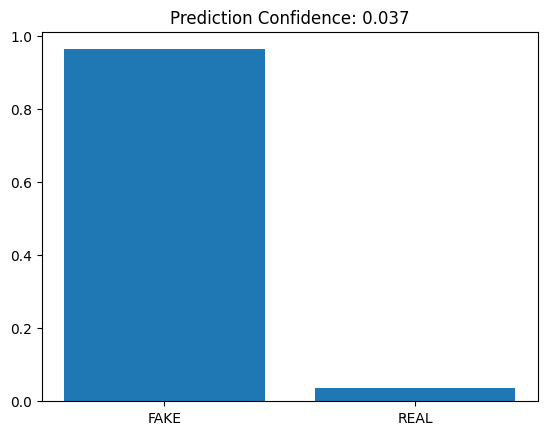

In [ ]:
import matplotlib.pyplot as plt

pred_value = pred[0][0]
plt.bar(["FAKE", "REAL"], [1 - pred_value, pred_value])
plt.title(f"Prediction Confidence: {pred_value:.3f}")
plt.show()
